In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import numpy as np
from tqdm import tqdm

# if torch.backends.mps.is_available():
#     torch.set_default_device("mps")

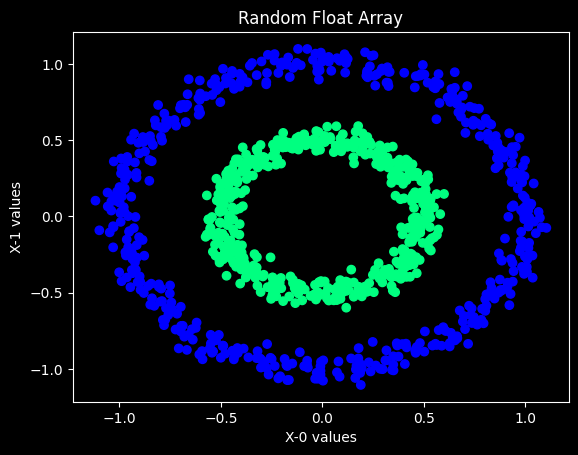

In [5]:
# Generate the circle dataset
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)

"""
Plots two lists of random floating-point numbers as (x, y) coordinates using Matplotlib
"""
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='winter')
plt.xlabel('X-0 values')
plt.ylabel('X-1 values')
plt.title('Random Float Array')
plt.show()

In [6]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()

In [7]:
X_train_tensor.shape

torch.Size([900, 2])

In [5]:
(X_train_tensor.shape[0], X_val_tensor.shape[0])

(900, 100)

In [6]:
# Define the MLP architecture
class MLP_Circle(nn.Module):
    def __init__(self):
        super(MLP_Circle, self).__init__()
        self.ly1 = nn.Linear(2, 10)
        self.ly2 = nn.Linear(10, 10)
        self.final = nn.Linear(10, 1)
        
        self.sig = nn.Sigmoid()
        
        
    def forward(self, x):
        out = self.ly1(x)
        out = self.sig(out)
        out = self.ly2(out)
        out = self.sig(out)
        out = self.final(out)
        return out

In [7]:
# Create an instance of the MLP model
model = MLP_Circle()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

In [8]:
model.eval()
y_pred = model(X_val_tensor)
before_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss before training' , before_train.item())

Test loss before training 1.0020158290863037


In [9]:
# Train the model
model.train()
epoch = 5000

for epoch in (pbar := tqdm(range(epoch))):
    pbar.set_description(f"Epoch {epoch + 1}")
    # Forward pass
    y_pred = model(X_train_tensor)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_tensor)
   
    pbar.set_postfix_str(f"Loss: {loss.item()}")
    
    # Zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 1:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 5000: 100%|██████████| 5000/5000 [00:08<00:00, 592.98it/s, Loss: 6.3858492467261385e-06]


In [10]:
model.eval()
y_pred = model(X_val_tensor)
after_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss after training' , after_train.item())

Test loss after training 5.360860814107582e-05


# Visualize the *nn* model thinks

In [11]:
# Generate all possible values for each parameter
min_value = -1.5
max_value = 1.5
step_size = 0.01

X = []

for x1 in tqdm(np.arange(min_value, max_value + step_size, step_size)):
    for x2 in np.arange(min_value, max_value + step_size, step_size):
        X = X + [[x1, x2]]

X = np.array(X)
X_test = torch.from_numpy(X).float()
X_test

100%|██████████| 301/301 [00:18<00:00, 16.14it/s]


tensor([[-1.5000, -1.5000],
        [-1.5000, -1.4900],
        [-1.5000, -1.4800],
        ...,
        [ 1.5000,  1.4800],
        [ 1.5000,  1.4900],
        [ 1.5000,  1.5000]])

In [12]:
y = model(X_test)
y

tensor([[0.0064],
        [0.0064],
        [0.0065],
        ...,
        [0.0042],
        [0.0044],
        [0.0046]], grad_fn=<AddmmBackward0>)

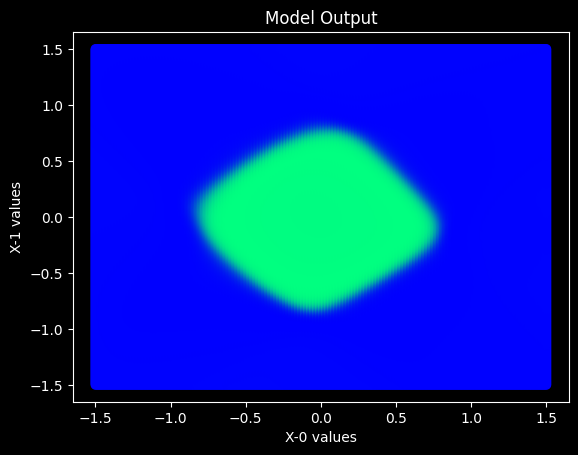

In [13]:
"""
Plots two lists of random floating-point numbers as (x, y) coordinates using Matplotlib
"""
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y.detach().cpu().numpy(), cmap='winter')
plt.xlabel('X-0 values')
plt.ylabel('X-1 values')
plt.title('Model Output')
plt.show()